In [15]:
from skimage import data, segmentation

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import cv2

import os
import skimage.io as sio
import tqdm
import datetime
import copy

In [48]:
img = data.astronaut()
w, h = int(img.shape[0]/3), int(img.shape[1]/3)
img = cv2.resize(img, (h, w))

# labels = segmentation.slic(img, compactness=10, n_segments=500, start_label=1)
labels = segmentation.slic(img, compactness=15, n_segments=500, start_label=1)
print(img.shape)

(170, 170, 3)


In [49]:
from src.segment.watershed import watershed_segmentation

In [56]:
# labels = watershed_segmentation(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))
labels = segmentation.slic(img, compactness=25, n_segments=100, start_label=1)

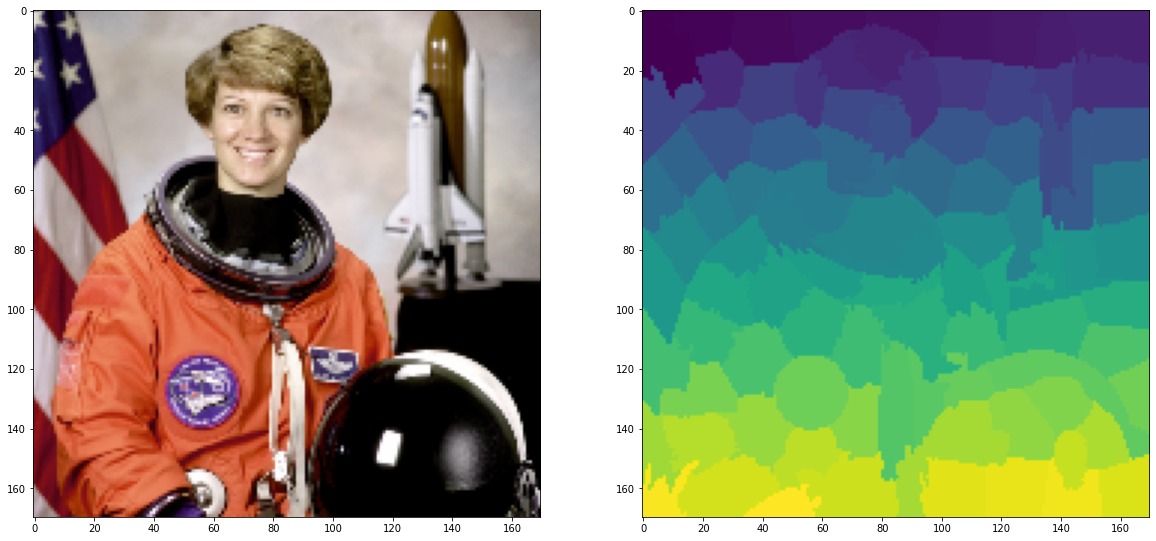

In [57]:
plt.figure(0, figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(labels)

plt.show()

In [58]:
len(np.unique(labels))

91

In [59]:
from src.rag import RAG
from src.utils import visualize_rag, quantize_image

In [60]:
from src.sprt import compute_averageColor, compute_conditionalProbability, compute_averageColor, sample_from_region, sprt_test

In [61]:
from src.region_merging import RegionMerging

# Start Region Merging

  0%|          | 0/1500 [00:00<?, ?it/s]

0:00:00.343355
Number of initial regions:  91


100%|██████████| 1500/1500 [09:51<00:00,  2.54it/s]


Number of final regions:  21
0:09:51.274480


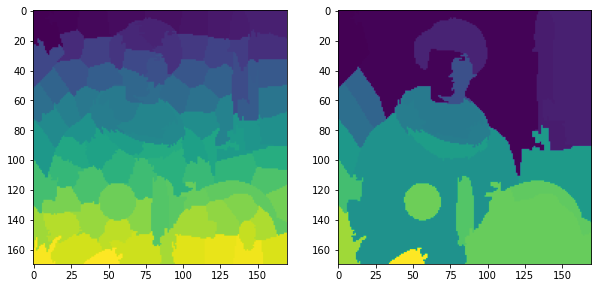

In [62]:
drm = RegionMerging(img, labels, lambda1=0.8, lambda2=0.1)
start = datetime.datetime.now()
initial_labels = drm.get_labels()
initial_graph = copy.deepcopy(drm.graph)
print("Number of initial regions: ", len(drm.graph.nodes))

drm.run_region_merging(1500)

new_labels = drm.get_labels()
print("Number of final regions: ", len(drm.graph.nodes))
print(datetime.datetime.now() - start)


# Visualize
plt.figure(0, figsize=(10, 7))
plt.subplot(1, 2, 1)
plt.imshow(initial_labels)
plt.subplot(1, 2, 2)
plt.imshow(new_labels)
plt.show()

In [63]:
def visualize_rag(img1, img, labels, graph):
    """
    Function to visualize RAG over the actual image and
    the segmented image.
    """
    # Create the plot placeholder
    plt.figure(0, figsize=(30, 10))
    
    plt.subplot(1, 3, 1)
    # Plot the image first
    plt.imshow(img1)
    
    plt.subplot(1, 3, 2)
    plt.imshow(img)

    # Iterate over all regions/nodes
    for ix in range(1, max(graph.edge_data)+1):
        curr = ix
        graph.edge_data
        for iy in graph.edge_data.get(ix, []):
            # Don't repeat lines for plots
            if iy > ix:
                region1_center = graph.nodes[ix][:, -2:].mean(0)
                region2_center = graph.nodes[iy][:, -2:].mean(0)

                # Line width related to the weight of the edge
                lw = graph.edges[(ix, iy)]

                x_coords = [region1_center[0], region2_center[0]]
                y_coords = [region1_center[1], region2_center[1]]
                plt.plot(y_coords, x_coords, 'k-o', linewidth=1*lw)
    
    # Same process for the segmented image. Shows better graphs
    plt.subplot(1, 3, 3)
    plt.imshow(labels)
    for ix in range(1, max(graph.edge_data)+1):
        curr = ix
        for iy in graph.edge_data.get(ix, []):
            if iy > ix:
                region1_center = graph.nodes[ix][:, -2:].mean(0)
                region2_center = graph.nodes[iy][:, -2:].mean(0)

                lw = graph.edges[(ix, iy)]

                # x_coords = [400-region1_center[0], 400-region2_center[0]]
                x_coords = [region1_center[0], region2_center[0]]
                y_coords = [region1_center[1], region2_center[1]]
                plt.plot(y_coords, x_coords, 'k-o', linewidth=1*lw)
    
    plt.show()

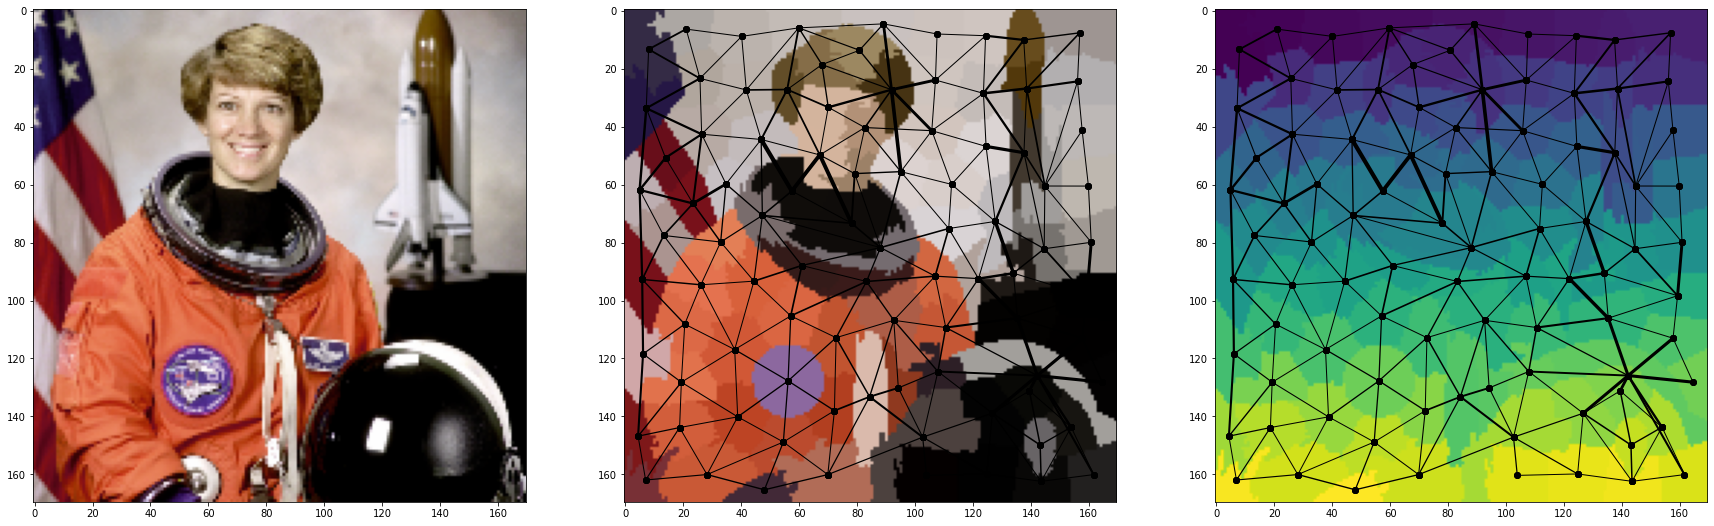

In [64]:
visualize_rag(img, quantize_image(img, initial_labels), initial_labels, initial_graph)

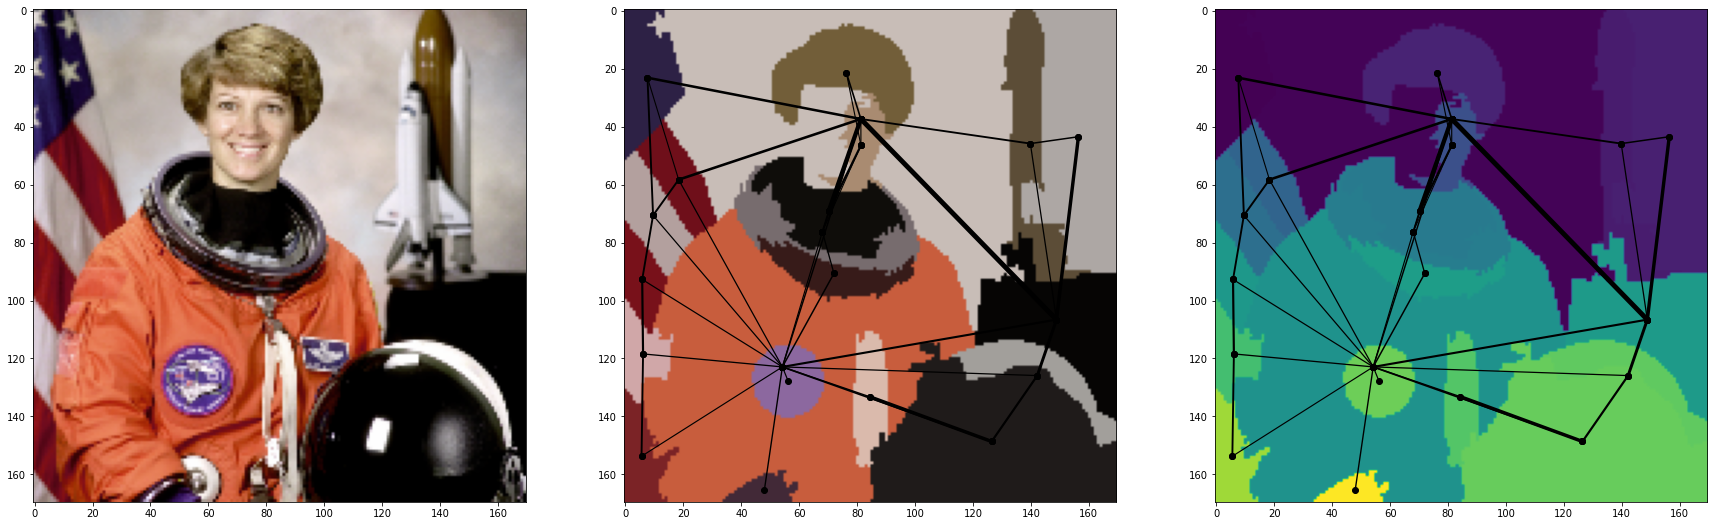

In [65]:
visualize_rag(img, drm.get_quant_image(), new_labels, drm.graph)